In [139]:
import pandas as pd
import numpy as np
import sklearn.model_selection
import sklearn.ensemble

In [140]:
adult_data = pd.read_csv('成人收入数据集2.csv')
adult_data

,年龄,工种,学历,受教育时间(年),职业,性别,每周工作时长,身高,体重
0,39,State-gov,Bachelors,13,Adm-clerical,Male,40,156.92,45.58
1,50,Self-emp-not-inc,Bachelors,13,Exec-managerial,Male,13,151.45,65.10
2,38,Private,HS-grad,9,Handlers-cleaners,Male,40,166.05,52.68
3,53,Private,11th,7,Handlers-cleaners,Male,40,163.45,63.45
4,28,Private,Bachelors,13,Prof-specialty,Female,40,157.60,54.33
...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Tech-support,Female,38,153.24,59.09
32557,40,Private,HS-grad,9,Machine-op-inspct,Male,40,158.28,61.78
32558,58,Private,HS-grad,9,Adm-clerical,Female,40,150.46,42.72
32559,22,Private,HS-grad,9,Adm-clerical,Male,20,156.35,74.07


In [141]:
np.unique(adult_data['学历'])

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

In [142]:
data = adult_data[['年龄', '学历', '受教育时间(年)', '性别']]
data

,年龄,学历,受教育时间(年),性别
0,39,Bachelors,13,Male
1,50,Bachelors,13,Male
2,38,HS-grad,9,Male
3,53,11th,7,Male
4,28,Bachelors,13,Female
...,...,...,...,...
32556,27,Assoc-acdm,12,Female
32557,40,HS-grad,9,Male
32558,58,HS-grad,9,Female
32559,22,HS-grad,9,Male


In [143]:
data = data.replace(' 9th', '高中')
data = data.replace(' 10th', '高中')
data = data.replace(' 11th', '高中')
data = data.replace(' 12th', '高中')
data = data.replace(' 5th-6th', '初中及以下')
data = data.replace(' 7th-8th', '初中及以下')
data = data.replace(' Preschool', ' 初中及以下')
data = data.replace(' Prof-school', '硕士')
data = data.replace(' HS-grad', '高中')
data = data.replace(' Masters', '硕士')
data = data.replace(' Bachelors', '硕士')
data = data.replace(' Assoc-voc', '博士')
data = data.replace(' Assoc-acdm', '博士')
data = data.replace(' Doctorate', '博士')
data = data.replace(' Some-college', '本科')

array([' 1st-4th', ' Some-college', ' 初中及以下', '初中及以下', '博士', '硕士', '高中'],
      dtype=object)

In [144]:
age_array = np.array(data['年龄']).reshape(-1, 1)
age_array

array([[39],
       [50],
       [38],
       ...,
       [58],
       [22],
       [52]], dtype=int64)

In [145]:
education_array = sklearn.preprocessing.OneHotEncoder().fit_transform(np.array(data['学历']).reshape(-1,1)).toarray()
education_array

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [146]:
gender_array = sklearn.preprocessing.OneHotEncoder().fit_transform(np.array(data['性别']).reshape(-1,1)).toarray()
gender_array

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [147]:
education_time_array = np.array(data['受教育时间(年)']).reshape(-1, 1)
education_time_array

array([[13],
       [13],
       [ 9],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=int64)

In [174]:
temp_data = np.concatenate((age_array, gender_array, education_time_array, education_array), axis=1)
temp_data.shape

(32561, 11)

In [178]:
target = np.array(adult_data['职业']).reshape(-1,1)
target.shape

(32561, 1)

In [179]:
pd.DataFrame(np.concatenate((temp_data, target), axis=1)).to_csv('成人收入数据集-预处理后.csv')

In [150]:
target = target.replace(' ?', None)
target = target.replace(' Adm-clerical', '教育')
target = target.replace(' Armed-Forces', None)
target = target.replace(' Craft-repair', None)
target = target.replace(' Handlers-cleaners', '服务')
target = target.replace(' Machine-op-inspct', '服务')
target = target.replace(' Transport-moving', '服务')
target = target.replace(' Other-service', None)
target = target.replace(' Priv-house-serv', '销售')
target = target.replace(' Sales', '销售')
target = target.replace(' Tech-support', '服务')
target = target.replace(' Farming-fishing', None)
target = target.replace(' Exec-managerial', '教育')
target = target.replace(' Prof-specialty', '教育')
target = target.replace(' Protective-serv', None)

In [151]:
np.unique(target)

array(['教育', '服务', '销售'], dtype=object)

In [152]:
target = sklearn.preprocessing.LabelEncoder().fit_transform(target)
target

array([0, 0, 1, ..., 0, 0, 0])

In [158]:
class Model:
    def __init__(self):
        self.data = temp_data
        self.target = target
        self.train_x, self.test_x, self.train_y, self.test_y = sklearn.model_selection.train_test_split(self.data, self.target)

    def fit(self, n_estimators, max_depth):
        self.classifier = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                                                  criterion='entropy',
                                                                  max_depth=max_depth)
        self.classifier.fit(self.train_x, self.train_y)
        return self.classifier.score(self.train_x, self.train_y), self.classifier.score(self.test_x, self.test_y)

    def predict(self, x):
        self.classifier.predict(x)

In [159]:
model = Model()
model.fit(43, 7)

In [163]:
import sklearn.decomposition
import sklearn.mixture

In [164]:
pca_data = sklearn.decomposition.PCA(n_components=2).fit_transform(model.data)
pca_data

array([[  0.44424101,  -3.01071039],
       [ 11.44374284,  -2.9288406 ],
       [ -0.5877927 ,   1.15066359],
       ...,
       [ 19.40515767,   1.30301524],
       [-16.58706808,   1.03158026],
       [ 13.4054294 ,   1.25835899]])

In [187]:
data = model.data[:1000]
label = model.target[:1000]

In [189]:
data.shape

(1000, 11)

In [190]:
label.shape

(1000,)

In [195]:
y = []
for i in range(2, 20):
    gmm = sklearn.mixture.GaussianMixture(n_components=i).fit_predict(data, label)
    score = sklearn.metrics.silhouette_score(data, gmm)
    print(score)
    y.append(abs(score))

0.14245287482950011
0.005914248901984523
-0.08597969420864132
-0.0769344141455385
-0.12999107821648168
-0.16729812480861653
-0.24438682878879006
-0.24351167702331317
-0.1618563763962194
-0.2608944071939006
-0.2154353805047147
-0.3349118416685383
-0.3484268525976161
-0.31188661895125186
-0.4111879733053983
-0.3303340148822374
-0.3457766144374539
-0.504642792833653


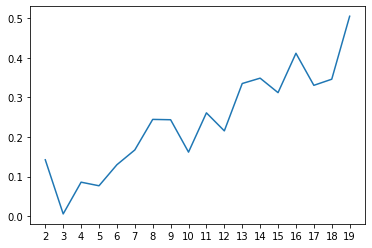

In [199]:
import matplotlib.pyplot as plt

plt.xticks(range(2, 20))
plt.plot(range(2,20), y)
plt.savefig('高斯聚类轮廓系数.png')

In [168]:
import matplotlib.pyplot as plt

education = []
service = []
sale = []
for index, each in enumerate(pca_data[:10000]):
    if gmm[index] == 0:
        education.append(each)
    elif gmm[index] == 1:
        service.append(each)
    else:
        sale.append(each)

education = np.mat(education)
service = np.mat(service)
sale = np.mat(sale)

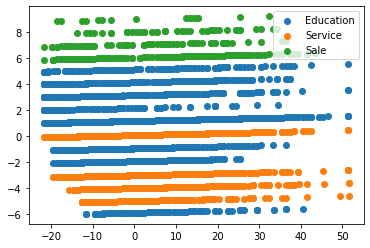

In [169]:
plt.scatter(education[:,0].tolist(), education[:,1].tolist(), label='Education')
plt.scatter(service[:,0].tolist(), service[:,1].tolist(), label='Service')
plt.scatter(sale[:,0].tolist(), sale[:,1].tolist(), label='Sale')
plt.legend()
plt.savefig('聚类效果.png')